<a href="https://colab.research.google.com/github/kaispace30098/Transfer_learning_img_classification/blob/main/Transfer_learning_CIFAR_10_Image_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Apr 23 04:19:24 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

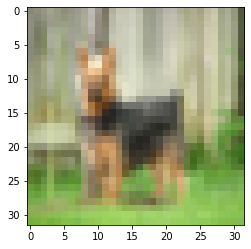

In [60]:
import tensorflow as tf
cifar10=tf.keras.datasets.cifar10

(x_train, y_train),(x_test,y_test)=cifar10.load_data()

from matplotlib import pyplot as plt
plt.imshow(x_test[24], interpolation='nearest')
plt.show()

In [3]:
def preprocess_data(X, Y):
    """
    Pre-processes the data for the model

        :param X: numpy.ndarray of shape (m, 32, 32, 3)
            containing the CIFAR 10 data, where m is the
            number of data points

        :param Y: numpy.ndarray of shape (m,) containing
            the CIFAR 10 labels for X

        :returns: X_p, Y_p
    """
    X1 = tf.keras.applications.resnet50.preprocess_input(X)

    # encode to one-hot
    Y1 = tf.keras.utils.to_categorical(Y, 10)
    return X1, Y1



In [4]:
x_train1,y_train1=preprocess_data(x_train,y_train)
x_test1, y_test1 = preprocess_data(x_test, y_test)

In [7]:
# input tensor
inputs = tf.keras.Input(shape=(32, 32, 3))

In [9]:
# upscale layer
upscale = tf.image.resize(inputs, [224, 224])

In [11]:
# load base model
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                        weights='imagenet',
                                        input_tensor=upscale,
                                        input_shape=(224,224,3),
                                        pooling="max")
base_model.trainable=False
                                        
out=base_model.output
out = tf.keras.layers.Flatten()(out)
out = tf.keras.layers.BatchNormalization()(out)
out=tf.keras.layers.Dense(10, activation='softmax')(out)


model = tf.keras.models.Model(inputs=inputs, outputs=out)

In [ ]:
model.summary()

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/5
391/391 [==============================] - 195s 454ms/step - loss: 0.4145 - accuracy: 0.8581 - val_loss: 0.3100 - val_accuracy: 0.8943
Epoch 2/5
391/391 [==============================] - 181s 462ms/step - loss: 0.2565 - accuracy: 0.9109 - val_loss: 0.2907 - val_accuracy: 0.9014
Epoch 3/5
391/391 [==============================] - 167s 428ms/step - loss: 0.2134 - accuracy: 0.9254 - val_loss: 0.2858 - val_accuracy: 0.9031
Epoch 4/5
391/391 [==============================] - 167s 427ms/step - loss: 0.1876 - accuracy: 0.9352 - val_loss: 0.2812 - val_accuracy: 0.9082
Epoch 5/5
391/391 [==============================] - 180s 461ms/step - loss: 0.1705 - accuracy: 0.9403 - val_loss: 0.2939 - val_accuracy: 0.9038


In [ ]:
cb=tf.keras.callbacks.TensorBoard(log_dir='logs')
# train
model.fit(x=x_train1,
          y=y_train1,
          batch_size=128,
          epochs=5,
          callbacks=cb,
          validation_data=(x_test1, y_test1))

In [14]:
!tensorboard dev upload --logdir ./logs/ \
  --name "Resnet50"\
  --description "Use Resnet50 as our feature extractor and train the model for cifar10 classification."\
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=pyvEGEjOxYS4UDdz1HPOgvDxYHJ0L0&prompt=consent&access_type=offline
Enter

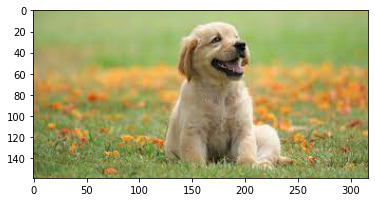

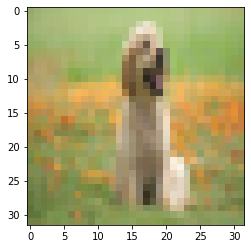

In [56]:
from PIL import Image
import numpy as np
# Opens a image in RGB mode
im = Image.open('/content/dog2.jpg')
plt.imshow(im)
plt.show()
newsize = (32, 32)
im1 = im.resize(newsize)
# Shows the image in image viewer
plt.imshow(im1)
plt.show()


In [59]:
imarray=np.array(im1)
image_batch= np.expand_dims(imarray,axis=0)
pred=model.predict(image_batch)
preds_classes = np.argmax(pred)
print(f' it is class {preds_classes}!' )

 it is class 5!
